In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
%matplotlib inline

In [2]:
ex1data = pd.read_table(os.getcwd()+"\\data\\ex1data1.txt", sep=",", header=None, names=["Population", "Profit"])

In [3]:
ex1data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [4]:
ex1data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


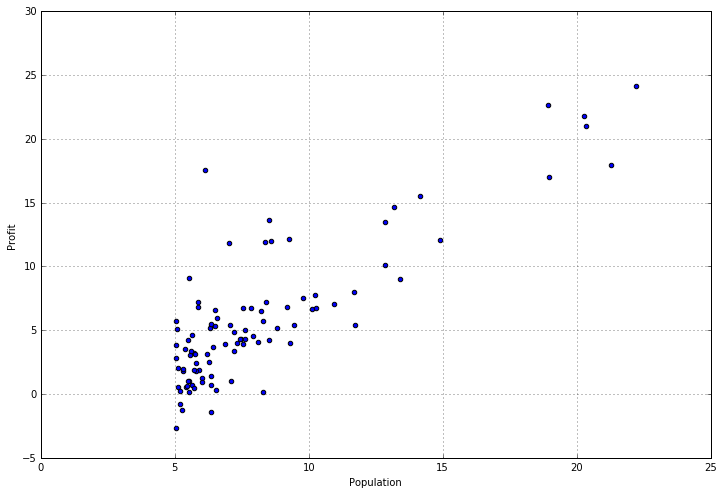

In [5]:
ex1data.plot(kind='scatter', x='Population', y='Profit', figsize=(12,8), grid=True)

#### Setting up initializations for the problem
* adding columns of ones
* initializing thetas
* setting up max iter
* setting up learning rate
* setting up DataFrames for X and y
* setting up numpy matrices

In [6]:
ex1data.insert(0, 'constant', 1)
theta = pd.DataFrame(0, index=range(1,ex1data.shape[1]),columns=['theta'], dtype='float')
iterations = 2000
alpha = 0.0001

y = ex1data["Profit"]
X = ex1data.loc[:, "constant":"Population"]

theta_mat = np.matrix(theta.values)
y_mat = np.matrix(y.values)
X_mat = np.matrix(X.values)

display(ex1data.head())
display(theta.head())

,constant,Population,Profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


,theta
1,0.0
2,0.0


#### Setting up the cost function
Also checking if the cost for initial values are calculated correctly

In [7]:
def computeCost(X,y,theta):
    
    current_args = dict(locals())
    for v in current_args:
       assert eval("isinstance(" + v + ", np.matrixlib.defmatrix.matrix)")
            
    recordCount = X.shape[0]
    inner = np.power(X*theta - y.T,2)
    return sum(inner)/(2*recordCount)

computeCost(X_mat,y_mat,theta_mat)

matrix([[ 32.07273388]])

In [8]:
def gradientDescent(X, y, theta, alpha, max_iter=1500, threshold=0.0001):
    recordCount = X.shape[0]
    cost_history = np.zeros((max_iter, 1), dtype=np.float32)
    
    current_args = [dict(locals())]
    for v in current_args:
        if v in ['X', 'y', 'theta']:
            assert eval("isinstance(" + v + ", np.matrixlib.defmatrix.matrix)")
    
    for i in xrange(0,iterations):
        theta = theta - sum(np.multiply(((X * theta) - y.T), X)).T*alpha/recordCount
        cost_history[i] = computeCost(X,y,theta)
        
    #theta_df = pd.DataFrame(theta, columns=['theta'])
    return (theta, cost_history)

(theta_mat, cost_history) = gradientDescent(X_mat, y_mat, theta_mat, alpha, max_iter = iterations)

#### Setting up Plots
1. Prediction Data
2. Cost History with iterations
3. Cost Contour

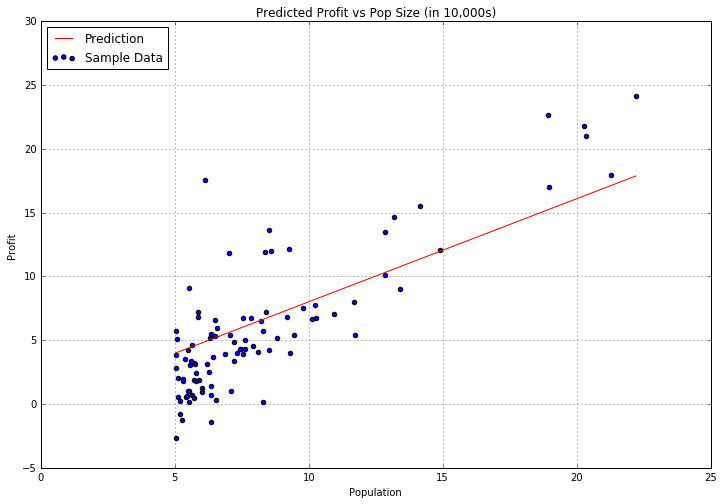

In [9]:
x = np.linspace(X.Population.min(),X.Population.max(), 100)
y_hat = theta_mat[0] + theta_mat[1] * x

plt.figure(figsize=(12,8))
plt.scatter(X["Population"], y, label='Sample Data')
plt.plot(x, y_hat.T, 'r', label='Prediction')
plt.grid()

ax = plt.gca()
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs Pop Size (in 10,000s)')


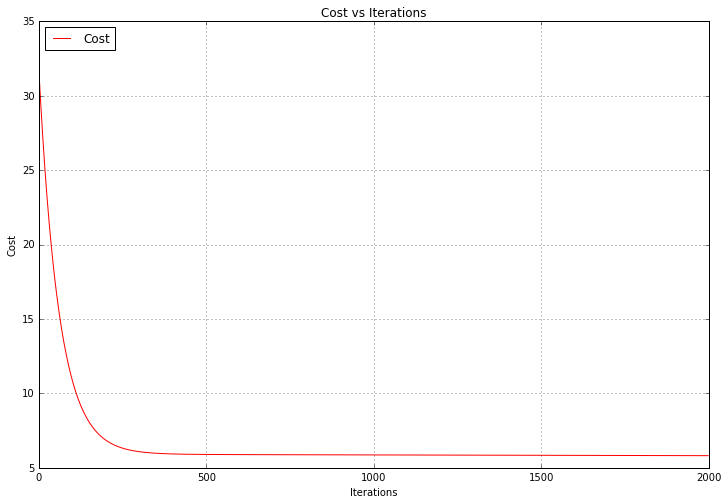

In [10]:
fig, ax = plt.subplots(figsize=(12,8))
x = np.arange(iterations)

plt.plot(x, cost_history, 'r', label='Cost')
plt.grid()
# ax.set_ylim([0, 5])

ax.legend(loc=2)
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Cost vs Iterations')


In [29]:
res = 1000
theta0_vals = np.linspace(-10, 10, res)
theta1_vals = np.linspace(-1, 4, res)
Z = np.empty((res, res), dtype=np.float32)

for i, x in enumerate(theta0_vals):
    for j, y_j in enumerate(theta1_vals):
        Z[i,j] = computeCost(X_mat, y_mat, np.matrix([[x], [y_j]]))

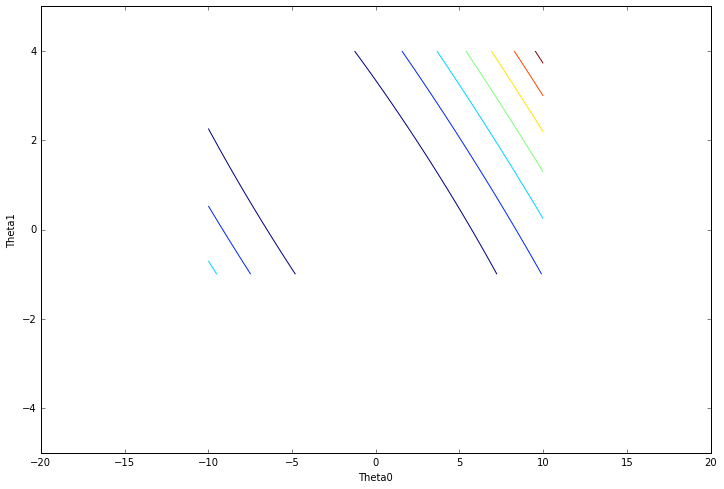

In [28]:
fig, ax = plt.subplots(figsize=(12,8))
ax.set_xlabel('Theta0')
ax.set_ylabel('Theta1')
ax.set_ylim([-5, 5])
ax.set_xlim([-20, 20])

plt.contour(theta0_vals, theta1_vals, Z)